In [352]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import os
import pickle
import pandas as pd

import seaborn as sns

In [47]:
import PyQt6.QtCore
os.environ["QT_API"] = "pyqt6"

In [139]:
raster_movie = scipy.io.loadmat('data/Caos_session1/rasters_movies.mat')['rasters']
#raster_image = scipy.io.loadmat('data/Caos_session1/rasters_images.mat')['rasters_images']

movie_names = scipy.io.loadmat('data/Caos_session1/movie_names.mat')['imgs']
movie_names = np.asarray([movie_names[i][0][0] for i in range(len(movie_names))])
#img_names = scipy.io.loadmat('data/Caos_session1/image_names.mat')['imgs_ims']
#img_names = np.asarray([img_names[i][0][0] for i in range(len(img_names))])

spikeID_movie = np.squeeze(scipy.io.loadmat('data/Caos_session1/spikeID_movies.mat')['spike_movies'])
#spikeID_ims = np.squeeze(scipy.io.loadmat('data/Caos_session1/spikeID_ims.mat')['spike_ims'])

In [380]:
def load_movie(path):

    raster_movie = scipy.io.loadmat(os.path.join(path, 'rasters_movies.mat'))['rasters']

    movie_names = scipy.io.loadmat(os.path.join(path, 'movie_names.mat'))['imgs']
    movie_names = np.asarray([movie_names[i][0][0] for i in range(len(movie_names))])

    spikeID_movie = np.squeeze(scipy.io.loadmat(os.path.join(path, 'spikeID_movies.mat'))['spike_movies'])

    return raster_movie, movie_names, spikeID_movie


In [141]:
def convert_channels(spikeID):

    channels =[]
    currunit = 1

    for i in range(len(spikeID)):
        if i ==0:
            currunit = 1
        else:
            if spikeID[i-1] == spikeID[i]:
                currunit+=1 
            else:
                currunit = 1

        channels.append(f"Channel{spikeID[i]}_Unit{currunit}")
    return channels

channels_movie = convert_channels(spikeID_movie)
channels_img = convert_channels(spikeID_ims)

## Analyze rasters and PSTH averaged over all trials

In [142]:
trial_avg_movie = np.mean(raster_movie, axis=2)
trial_avg_image = np.mean(raster_image, axis=2)

norm_trial_avg_movie = scipy.stats.zscore(trial_avg_movie, axis=1)
norm_trial_avg_image = scipy.stats.zscore(trial_avg_image, axis=1)

In [143]:
%matplotlib qt 

fig = plt.figure()

plt.imshow(norm_trial_avg_movie)
plt.xlabel('Normalized trial averaged activity')
plt.ylabel('Channel')
plt.colorbar()  # Add a colorbar
plt.title('Caos, session1, movies')
plt.show()

In [51]:
%matplotlib qt 

fig = plt.figure()

plt.imshow(norm_trial_avg_image)
plt.xlabel('Normalized trial averaged activity')
plt.ylabel('Channel')
plt.colorbar()  # Add a colorbar
plt.title('Caos, session1, images')
plt.show()

In [90]:
qual = input()

if int(qual) not in [1,2,3,4]:
    print('false')
else:
    print('true')

true


In [382]:
%matplotlib inline

def check_PSTH(raster, channels, filename):
    qual_dict = {'Poor':[], 'Fair':[], 'Good':[], 'Excellent':[]}
    
    trial_avg_data = np.mean(raster, axis=2)
    sem = scipy.stats.sem(raster, axis=2)

    for i in range(trial_avg_data.shape[0]):
        fig = plt.figure()
        plt.plot(np.arange(trial_avg_data.shape[1]),trial_avg_data[i])
        plt.fill_between(np.arange(trial_avg_data.shape[1]),trial_avg_data[i]+1.96*sem[i], trial_avg_data[i]-1.96*sem[i], alpha=0.5)
        plt.show()

        qual = input("How good is this PSTH")

        while qual not in ['1','2','3','4']:
            qual = input('invalid input, should be one of 1, 2, 3, 4')
            
        if qual == '1':
            qual_dict['Poor'].append((i, channels[i]))

        elif qual == '2':
            qual_dict['Fair'].append((i, channels[i]))

        elif qual == '3':
            qual_dict['Good'].append((i, channels[i]))

        elif qual == '4': 
            qual_dict['Excellent'].append((i, channels[i]))

        plt.close()

    with open(f'{filename}.pickle', 'wb') as pick:
        pickle.dump(qual_dict, pick, protocol=pickle.HIGHEST_PROTOCOL)

    return qual_dict

#movie_qualdict = check_PSTH(raster_movie, channels_movie, 'data/Caos_session1/movie_PSTH')

In [ ]:
image_qualdict = check_PSTH(raster_image, channels_img, 'data/Caos_session1/image_PSTH')

In [95]:
with open('data/Caos_session1/movie_PSTH.pickle', 'rb') as pick:
    movie_qualdict = pickle.load(pick)


In [ ]:
trial_avg_data = np.mean(raster_movie, axis=2)
sem = scipy.stats.sem(raster_movie, axis=2)

for value in movie_qualdict['Poor']:
    fig, plt.figure()

    i = value[0]

    plt.plot(np.arange(trial_avg_data.shape[1]),trial_avg_data[i])
    plt.fill_between(np.arange(trial_avg_data.shape[1]),trial_avg_data[i]+1.96*sem[i], trial_avg_data[i]-1.96*sem[i], alpha=0.5)

    #plt.plot(trial_avg_movie[value[0]])
    plt.title(f'{value[1]} , poor quality')

    plt.show()

In [149]:
print(len(movie_qualdict['Poor']))
print(len(movie_qualdict['Fair']))
print(len(movie_qualdict['Good']))
print(len(movie_qualdict['Excellent']))

print(len(image_qualdict['Poor']))
print(len(image_qualdict['Fair']))
print(len(image_qualdict['Good']))
print(len(image_qualdict['Excellent']))

23
18
31
55
29
14
17
66


In [ ]:
trial_avg_data = np.mean(raster_movie, axis=2)
sem = scipy.stats.sem(raster_movie, axis=2)

for value in movie_qualdict['Excellent']:
    fig, plt.figure()

    i = value[0]

    plt.plot(np.arange(trial_avg_data.shape[1]),trial_avg_data[i])
    plt.fill_between(np.arange(trial_avg_data.shape[1]),trial_avg_data[i]+1.96*sem[i], trial_avg_data[i]-1.96*sem[i], alpha=0.5)

    #plt.plot(trial_avg_movie[value[0]])
    plt.title(f'{value[1]} , Excellent quality')

    plt.show()

In [151]:
print(movie_qualdict['Excellent'])
print(image_qualdict['Excellent'])

[(8, 'Channel6_Unit1'), (10, 'Channel7_Unit2'), (22, 'Channel13_Unit1'), (24, 'Channel15_Unit1'), (26, 'Channel16_Unit2'), (41, 'Channel28_Unit1'), (46, 'Channel33_Unit1'), (47, 'Channel34_Unit1'), (48, 'Channel35_Unit1'), (49, 'Channel36_Unit1'), (51, 'Channel37_Unit1'), (52, 'Channel38_Unit1'), (53, 'Channel39_Unit1'), (54, 'Channel40_Unit1'), (56, 'Channel41_Unit1'), (57, 'Channel42_Unit1'), (58, 'Channel43_Unit1'), (59, 'Channel44_Unit1'), (60, 'Channel45_Unit1'), (61, 'Channel46_Unit1'), (62, 'Channel47_Unit1'), (63, 'Channel48_Unit1'), (64, 'Channel49_Unit1'), (65, 'Channel50_Unit1'), (66, 'Channel51_Unit1'), (67, 'Channel51_Unit2'), (68, 'Channel52_Unit1'), (69, 'Channel53_Unit1'), (70, 'Channel54_Unit1'), (72, 'Channel55_Unit2'), (73, 'Channel56_Unit1'), (74, 'Channel57_Unit1'), (76, 'Channel59_Unit1'), (77, 'Channel60_Unit1'), (78, 'Channel61_Unit1'), (79, 'Channel62_Unit1'), (80, 'Channel63_Unit1'), (81, 'Channel64_Unit1'), (82, 'Channel65_Unit1'), (83, 'Channel66_Unit1'), (8

In [152]:
movie_solid = [channel[1] for channel in movie_qualdict['Excellent']+movie_qualdict['Good']] 
movie_solid_ind = [channel[0] for channel in movie_qualdict['Excellent']+movie_qualdict['Good']] 
image_solid = [channel[1] for channel in image_qualdict['Excellent']+image_qualdict['Good']] 
image_solid_ind = [channel[0] for channel in image_qualdict['Excellent']+image_qualdict['Good']] 

In [153]:
mov_solid_chans = [movie_solid_ind[i] for i in range(len(movie_solid)) if movie_solid[i] in image_solid]
mov_solid_channames = [movie_solid[i] for i in range(len(movie_solid)) if movie_solid[i] in image_solid]
img_solid_chans = [image_solid_ind[i] for i in range(len(image_solid)) if image_solid[i] in movie_solid]
img_solid_channames = [image_solid[i] for i in range(len(image_solid)) if image_solid[i] in movie_solid]

In [426]:
len(mov_solid_chans)

74

In [154]:
mov_sol_chan_sort = sorted(zip(mov_solid_channames, mov_solid_chans), key=lambda x: x[0])
img_sol_chan_sort = sorted(zip(img_solid_channames, img_solid_chans), key=lambda x: x[0])

sort_mov_channames, sort_mov_indexes = zip(*mov_sol_chan_sort)
sort_img_channames, sort_img_indexes = zip(*img_sol_chan_sort)

In [246]:
mov_sol_chan_sort

[('Channel10_Unit1', 17),
 ('Channel11_Unit1', 18),
 ('Channel12_Unit2', 20),
 ('Channel15_Unit1', 24),
 ('Channel16_Unit2', 26),
 ('Channel18_Unit1', 29),
 ('Channel1_Unit1', 0),
 ('Channel21_Unit1', 32),
 ('Channel23_Unit1', 34),
 ('Channel24_Unit1', 35),
 ('Channel28_Unit1', 41),
 ('Channel30_Unit1', 43),
 ('Channel33_Unit1', 46),
 ('Channel34_Unit1', 47),
 ('Channel35_Unit1', 48),
 ('Channel36_Unit1', 49),
 ('Channel37_Unit1', 51),
 ('Channel38_Unit1', 52),
 ('Channel40_Unit1', 54),
 ('Channel41_Unit1', 56),
 ('Channel42_Unit1', 57),
 ('Channel43_Unit1', 58),
 ('Channel44_Unit1', 59),
 ('Channel45_Unit1', 60),
 ('Channel46_Unit1', 61),
 ('Channel47_Unit1', 62),
 ('Channel48_Unit1', 63),
 ('Channel49_Unit1', 64),
 ('Channel50_Unit1', 65),
 ('Channel51_Unit1', 66),
 ('Channel51_Unit2', 67),
 ('Channel52_Unit1', 68),
 ('Channel53_Unit1', 69),
 ('Channel54_Unit1', 70),
 ('Channel55_Unit2', 72),
 ('Channel56_Unit1', 73),
 ('Channel57_Unit1', 74),
 ('Channel58_Unit1', 75),
 ('Channel59_U

In [171]:
print(sort_mov_channames[72])
print(sort_mov_indexes[72])
print(np.argwhere(sort_mov_channames=='Channel94_Unit1'))
print(sort_mov_indexes[np.argwhere(sort_mov_channames=='Channel94_Unit1')])

Channel94_Unit1
123
[]


TypeError: only integer scalar arrays can be converted to a scalar index

In [378]:
trial_avg_data_mov = np.mean(raster_movie, axis=2)
sem_mov = scipy.stats.sem(raster_movie, axis=2)

trial_avg_data_img = np.mean(raster_image, axis=2)
sem_img = scipy.stats.sem(raster_image, axis=2)

for i in range(len(sort_mov_channames)):
    
    mov_ind = sort_mov_indexes[i]
    mov_name = sort_mov_channames[i]

    img_ind = sort_img_indexes[i]
    img_name = sort_img_channames[i]

    fig, plt.figure()

    plt.plot(np.arange(trial_avg_data_mov.shape[1]),trial_avg_data_mov[mov_ind])
    plt.fill_between(np.arange(trial_avg_data_mov.shape[1]),trial_avg_data_mov[mov_ind]+1.96*sem_mov[mov_ind], trial_avg_data_mov[mov_ind]-1.96*sem_mov[mov_ind], alpha=0.5)

    #plt.plot(trial_avg_movie[value[0]])
    plt.title(f'{mov_name} , Movie')

    plt.show()

    fig, plt.figure()

    plt.plot(np.arange(trial_avg_data_img.shape[1]),trial_avg_data_img[img_ind])
    plt.fill_between(np.arange(trial_avg_data_img.shape[1]),trial_avg_data_img[img_ind]+1.96*sem_img[img_ind], trial_avg_data_img[img_ind]-1.96*sem_img[img_ind], alpha=0.5)

    #plt.plot(trial_avg_movie[value[0]])
    plt.title(f'{img_name} , Image')

    plt.show()

/var/folders/9t/68zflby9385dfmd93cm_b7ph0000gn/T/ipykernel_72091/1758532956.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, plt.figure()


In [162]:
mov_stim_indexes = {}

for i in range(len(movie_names)):

    mov = movie_names[i]
    if not mov in mov_stim_indexes.keys():
        mov_stim_indexes[mov] = [i]

    else:
        mov_stim_indexes[mov].append(i)

In [247]:
mov_stim_indexes

{np.str_('ambulance_sped_inverted_shuffle'): [0, 34, 41, 109, 133, 150, 207],
 np.str_('komodo_first_original_shuffle'): [1, 46, 86, 124, 147, 182, 201],
 np.str_('komodo_first_noise_shuffle'): [2, 51, 106, 132, 154, 195],
 np.str_('komodo_first_original'): [3, 38, 95, 120, 158, 198],
 np.str_('ambulance_sped_noise_shuffle'): [4, 50, 77, 114, 162, 220, 224],
 np.str_('komodo_first_inverted'): [5, 57, 73, 74, 126, 156, 208],
 np.str_('ambulance_sped_original_shuffle'): [6, 65, 101, 121, 153, 185],
 np.str_('komodo_sped_noise_shuffle'): [7, 61, 83, 115, 163, 213],
 np.str_('ambulance_sped_noise'): [8, 66, 93, 122, 172, 191],
 np.str_('ambulance_sped_inverted'): [9, 49, 85, 127, 166, 192, 221],
 np.str_('komodo_sped_inverted_shuffle'): [10, 56, 97, 113, 164, 200],
 np.str_('macaque_eating_sped_inverted'): [11, 54, 94, 143, 183, 187],
 np.str_('macaque_eating_first_inverted'): [12, 52, 100, 138, 175, 216],
 np.str_('ambulance_first_noise_shuffle'): [13, 69, 82, 112, 159, 189],
 np.str_('ko

In [181]:
%matplotlib qt

def compare_movies_by_channel(raster_movie, movie, channelname, channelindex, mov_stim_indexes):

    fig, axs = plt.subplots(4,3, sharex=True, sharey=True)

    channel_data = np.squeeze(raster_movie[channelindex,:,:]) # time_bins x trials

    mov_opts = ['sped', 'first']
    mov_perts = ['original', 'inverted', 'noise']

    for i in range(len(mov_opts)):
        for j in range(len(mov_perts)):

            norm_name = f"{movie}_{mov_opts[i]}_{mov_perts[j]}"
            shuffle_name = f"{movie}_{mov_opts[i]}_{mov_perts[j]}_shuffle"

            norm_mov_inds = mov_stim_indexes[norm_name]
            shuffle_mov_inds = mov_stim_indexes[shuffle_name]

            norm_mov_trials = channel_data[:, norm_mov_inds]
            shuffle_mov_trials = channel_data[:, shuffle_mov_inds]

            norm_avg = np.mean(norm_mov_trials, axis=1)
            shuffle_avg = np.mean(shuffle_mov_trials, axis=1)

            norm_sem = scipy.stats.sem(norm_mov_trials, axis=1)
            shuffle_sem = scipy.stats.sem(shuffle_mov_trials, axis=1)

            axs[i*2,j].plot(norm_avg)
            axs[i*2,j].fill_between(np.arange(len(norm_avg)), norm_avg+1.96*norm_sem, norm_avg-1.96*norm_sem, alpha=0.5)

            if i == 0: # Flip because of mistake with sped and first on first iteration with Caos and D
                axs[i*2,j].set_title(f"{mov_opts[1]}_{mov_perts[j]}")
                axs[i*2+1,j].set_title(f"{mov_opts[1]}_{mov_perts[j]}_shuffle")
            else:
                axs[i*2,j].set_title(f"{mov_opts[0]}_{mov_perts[j]}")
                axs[i*2+1,j].set_title(f"{mov_opts[0]}_{mov_perts[j]}_shuffle")

            axs[i*2+1,j].plot(shuffle_avg)
            axs[i*2+1,j].fill_between(np.arange(len(shuffle_avg)), shuffle_avg+1.96*shuffle_sem, shuffle_avg-1.96*shuffle_sem, alpha=0.5)

    fig.suptitle(f"PSTHs for {movie}, {channelname}")

    plt.show()

compare_movies_by_channel(raster_movie, 'ambulance', 'Channel72_Unit1', 123, mov_stim_indexes)

In [251]:
mov_stim_indexes

{np.str_('ambulance_sped_inverted_shuffle'): [0, 34, 41, 109, 133, 150, 207],
 np.str_('komodo_first_original_shuffle'): [1, 46, 86, 124, 147, 182, 201],
 np.str_('komodo_first_noise_shuffle'): [2, 51, 106, 132, 154, 195],
 np.str_('komodo_first_original'): [3, 38, 95, 120, 158, 198],
 np.str_('ambulance_sped_noise_shuffle'): [4, 50, 77, 114, 162, 220, 224],
 np.str_('komodo_first_inverted'): [5, 57, 73, 74, 126, 156, 208],
 np.str_('ambulance_sped_original_shuffle'): [6, 65, 101, 121, 153, 185],
 np.str_('komodo_sped_noise_shuffle'): [7, 61, 83, 115, 163, 213],
 np.str_('ambulance_sped_noise'): [8, 66, 93, 122, 172, 191],
 np.str_('ambulance_sped_inverted'): [9, 49, 85, 127, 166, 192, 221],
 np.str_('komodo_sped_inverted_shuffle'): [10, 56, 97, 113, 164, 200],
 np.str_('macaque_eating_sped_inverted'): [11, 54, 94, 143, 183, 187],
 np.str_('macaque_eating_first_inverted'): [12, 52, 100, 138, 175, 216],
 np.str_('ambulance_first_noise_shuffle'): [13, 69, 82, 112, 159, 189],
 np.str_('ko

In [263]:
raster_movie.shape

(127, 1000, 225)

In [394]:
#movies = ['ambulance', 'cats_jumping', 'fan', 'horses', 'komodo', 'macaque_eating', 'macaque_running', 'monkey_fighting', 'monkey_grooming', 'soccer_ball']
movies = ['ambulance', 'komodo', 'macaque_eating']

def save_PSTH_display(raster_movie, movies, channels, mov_stim_indexes, path, flip=False):

    mov_opts = ['sped', 'first']

    for channel in channels:

        channel_name = channel[0]
        channel_index = channel[1]
    
        for movie in movies:

            channel_data = np.squeeze(raster_movie[channel_index,:,:]) # time_bins x trials

            fig, axs = plt.subplots(1,2, figsize=(20,5))

            for i in range(len(mov_opts)):

                norm_name = f"{movie}_{mov_opts[i]}_original"
                shuffle_name = f"{movie}_{mov_opts[i]}_original_shuffle"

                inv_name = f"{movie}_{mov_opts[i]}_inverted"
                inv_shuffle_name = f"{movie}_{mov_opts[i]}_inverted_shuffle"

                norm_mov_inds = mov_stim_indexes[norm_name]
                shuffle_mov_inds = mov_stim_indexes[shuffle_name]

                inv_mov_inds = mov_stim_indexes[inv_name]
                inv_shuffle_mov_inds = mov_stim_indexes[inv_shuffle_name]

                norm_mov_trials = channel_data[:, norm_mov_inds]
                shuffle_mov_trials = channel_data[:, shuffle_mov_inds]

                inv_mov_trials = channel_data[:, inv_mov_inds]
                inv_shuffle_mov_trials = channel_data[:, inv_shuffle_mov_inds]

                norm_avg = np.mean(norm_mov_trials, axis=1)
                shuffle_avg = np.mean(shuffle_mov_trials, axis=1)

                inv_avg = np.mean(inv_mov_trials, axis=1)
                inv_shuffle_avg = np.mean(inv_shuffle_mov_trials, axis=1)

                data = np.vstack((norm_avg, shuffle_avg, inv_avg, inv_shuffle_avg))

                im = axs[i].imshow(data, aspect='auto', cmap='coolwarm', interpolation='nearest')

                axs[i].set_xlabel('Time post stim (msec)')

            if flip == True:
                axs[0].set_title('First') #flipped because mistake on first run, corrected later
                axs[1].set_title('Sped')

            else:
                axs[1].set_title('First')
                axs[0].set_title('Sped')

            movie_labels = ['Original', 'Shuffle', 'Inverted', 'Inv Shuffle']

            axs[0].set_yticks(range(len(movie_labels)), movie_labels)  # Add row labels
            axs[1].set_yticks([])

            cbar = plt.colorbar(im)
            cbar.set_label('Spikes/s', rotation=270, labelpad=15)

            plt.suptitle(f'PSTHs for {movie}, {channel_name}')

            plt.tight_layout()

            if not os.path.exists(os.path.join(path, 'PSTHs',movie)):
                os.mkdir(os.path.join(path, 'PSTHs',movie))

            plt.savefig(os.path.join(path, 'PSTHs',f'{movie}/{channel_name}.png'), dpi=300, bbox_inches='tight')
            plt.close(fig)


#save_PSTH_display(raster_movie, movies,mov_sol_chan_sort, mov_stim_indexes)


In [348]:
import re

def extract_channel_i(string):
    match = re.search(r"Channel(\d+)_Unit", string)
    if match:
        return int(match.group(1))  # Extract and convert to integer
    return None  # Return None if no match is found


In [403]:
Caos_session2_1_df[Caos_session2_1_df['Average firing']<1]

,Filename,Movie,Channel,Perturb,Option,Region,Average firing,Std
11,fan_first_noise_shuffle,fan,Channel83_Unit1,noise_shuffle,sped,IT,0.000000,0.000000
25,fan_first_noise_shuffle,fan,Channel68_Unit2,noise_shuffle,sped,IT,0.000000,0.000000
28,fan_first_noise_shuffle,fan,Channel66_Unit1,noise_shuffle,sped,IT,0.000000,0.000000
43,fan_first_noise_shuffle,fan,Channel51_Unit2,noise_shuffle,sped,V4,0.000000,0.000000
49,fan_first_noise_shuffle,fan,Channel46_Unit1,noise_shuffle,sped,V4,0.605440,3.725670
...,...,...,...,...,...,...,...,...
2639,macaque_running_sped_original,macaque_running,Channel46_Unit1,original,first,V4,0.605440,3.725670
2649,macaque_running_sped_original,macaque_running,Channel35_Unit1,original,first,V4,0.302720,2.651782
2655,macaque_running_sped_original,macaque_running,Channel23_Unit1,original,first,V1,0.000000,0.000000
2661,macaque_running_sped_original,macaque_running,Channel12_Unit2,original,first,V1,0.000000,0.000000


In [410]:
def get_trial_df(raster_movie, movies, channels, mov_stim_indexes, monkey, flip=False):

    df = pd.DataFrame(columns=['Filename', 'Movie', 'Channel', 'Perturb', 'Option', 'Region', 'Average firing', 'Std'])

    mov_opts = ['sped', 'first']
    mov_perturb = ['original', 'original_shuffle', 'inverted', 'inverted_shuffle']

    for movie in movies:

        for i in range(len(mov_opts)):

            for j in range(len(mov_perturb)):
            
                fullname = f"{movie}_{mov_opts[i]}_{mov_perturb[j]}"

                mov_inds = mov_stim_indexes[fullname]

                mov_trials = raster_movie[:,50:600, mov_inds]

                for channel in channels:

                    channel_name = channel[0]
                    channel_index = channel[1]

                    channel_num = extract_channel_i(channel_name)

                    if monkey == 'Caos':
                        if channel_num < 33:
                            region = 'V1'
                        elif channel_num <65:
                            region = 'V4'
                        else:
                            region = 'IT'

                    elif monkey == 'Diabolito':
                        if channel_num <17:
                            region = 'V1'
                        elif channel_num <33:
                            region = 'V4'
                        else:
                            region = 'IT'

                    chan_trials = mov_trials[channel_index,:,:]
                    
                    avg_chan_trace = np.mean(chan_trials,axis=1)

                    avg_firing = np.mean(avg_chan_trace)
                    std_firing = np.std(avg_chan_trace)

                    if flip ==True:
                        df.loc[-1] = [fullname, movie, channel_name, mov_perturb[j], mov_opts[i-1], region, avg_firing, std_firing] # i-1 because of reversal thing
                    else:
                        df.loc[-1] = [fullname, movie, channel_name, mov_perturb[j], mov_opts[i], region,avg_firing, std_firing]

                    df.index = df.index + 1
                    df = df.sort_index()

    return df

df = get_trial_df(raster_movie, movies,mov_sol_chan_sort, mov_stim_indexes, 'Caos')

In [423]:
df

,Filename,Movie,Channel,Perturb,Option,Region,Average firing,Std
0,macaque_eating_first_inverted_shuffle,macaque_eating,Channel95_Unit1,inverted_shuffle,first,IT,87.068439,40.107831
1,macaque_eating_first_inverted_shuffle,macaque_eating,Channel94_Unit1,inverted_shuffle,first,IT,130.937558,63.208334
2,macaque_eating_first_inverted_shuffle,macaque_eating,Channel93_Unit3,inverted_shuffle,first,IT,39.113174,34.331958
3,macaque_eating_first_inverted_shuffle,macaque_eating,Channel93_Unit2,inverted_shuffle,first,IT,63.367812,39.113313
4,macaque_eating_first_inverted_shuffle,macaque_eating,Channel92_Unit1,inverted_shuffle,first,IT,120.213210,54.184737
...,...,...,...,...,...,...,...,...
1771,ambulance_sped_original,ambulance,Channel16_Unit2,original,sped,V1,126.795734,43.504730
1772,ambulance_sped_original,ambulance,Channel15_Unit1,original,sped,V1,153.614628,65.518520
1773,ambulance_sped_original,ambulance,Channel12_Unit2,original,sped,V1,68.349374,49.795787
1774,ambulance_sped_original,ambulance,Channel11_Unit1,original,sped,V1,76.399375,43.525230


In [436]:
Caos_session1_1_df

,Filename,Movie,Channel,Perturb,Option,Region,Average firing,Std
0,macaque_eating_first_inverted_shuffle,macaque_eating,Channel9_Unit2,inverted_shuffle,first,V1,66.398146,36.611351
1,macaque_eating_first_inverted_shuffle,macaque_eating,Channel95_Unit1,inverted_shuffle,first,IT,87.068439,40.107831
2,macaque_eating_first_inverted_shuffle,macaque_eating,Channel94_Unit1,inverted_shuffle,first,IT,130.937558,63.208334
3,macaque_eating_first_inverted_shuffle,macaque_eating,Channel93_Unit3,inverted_shuffle,first,IT,39.113174,34.331958
4,macaque_eating_first_inverted_shuffle,macaque_eating,Channel93_Unit2,inverted_shuffle,first,IT,63.367812,39.113313
...,...,...,...,...,...,...,...,...
2059,ambulance_sped_original,ambulance,Channel15_Unit1,original,sped,V1,153.614628,65.518520
2060,ambulance_sped_original,ambulance,Channel13_Unit1,original,sped,V1,95.902052,45.644676
2061,ambulance_sped_original,ambulance,Channel12_Unit2,original,sped,V1,68.349374,49.795787
2062,ambulance_sped_original,ambulance,Channel11_Unit1,original,sped,V1,76.399375,43.525230


In [427]:
mov_sol_chan_sort

[('Channel10_Unit1', 17),
 ('Channel11_Unit1', 18),
 ('Channel12_Unit2', 20),
 ('Channel15_Unit1', 24),
 ('Channel16_Unit2', 26),
 ('Channel18_Unit1', 29),
 ('Channel1_Unit1', 0),
 ('Channel21_Unit1', 32),
 ('Channel23_Unit1', 34),
 ('Channel24_Unit1', 35),
 ('Channel28_Unit1', 41),
 ('Channel30_Unit1', 43),
 ('Channel33_Unit1', 46),
 ('Channel34_Unit1', 47),
 ('Channel35_Unit1', 48),
 ('Channel36_Unit1', 49),
 ('Channel37_Unit1', 51),
 ('Channel38_Unit1', 52),
 ('Channel40_Unit1', 54),
 ('Channel41_Unit1', 56),
 ('Channel42_Unit1', 57),
 ('Channel43_Unit1', 58),
 ('Channel44_Unit1', 59),
 ('Channel45_Unit1', 60),
 ('Channel46_Unit1', 61),
 ('Channel47_Unit1', 62),
 ('Channel48_Unit1', 63),
 ('Channel49_Unit1', 64),
 ('Channel50_Unit1', 65),
 ('Channel51_Unit1', 66),
 ('Channel51_Unit2', 67),
 ('Channel52_Unit1', 68),
 ('Channel53_Unit1', 69),
 ('Channel54_Unit1', 70),
 ('Channel55_Unit2', 72),
 ('Channel56_Unit1', 73),
 ('Channel57_Unit1', 74),
 ('Channel58_Unit1', 75),
 ('Channel59_U

In [429]:
movie_qualdict

{'Poor': [(2, 'Channel3_Unit1'),
  (4, 'Channel3_Unit3'),
  (9, 'Channel7_Unit1'),
  (11, 'Channel8_Unit1'),
  (13, 'Channel9_Unit1'),
  (15, 'Channel9_Unit3'),
  (16, 'Channel9_Unit4'),
  (19, 'Channel12_Unit1'),
  (21, 'Channel12_Unit3'),
  (25, 'Channel16_Unit1'),
  (28, 'Channel17_Unit2'),
  (31, 'Channel20_Unit1'),
  (33, 'Channel22_Unit1'),
  (36, 'Channel25_Unit1'),
  (38, 'Channel25_Unit3'),
  (55, 'Channel40_Unit2'),
  (71, 'Channel55_Unit1'),
  (88, 'Channel70_Unit1'),
  (89, 'Channel71_Unit1'),
  (115, 'Channel90_Unit2'),
  (117, 'Channel91_Unit2'),
  (119, 'Channel92_Unit2'),
  (126, 'Channel96_Unit2')],
 'Fair': [(3, 'Channel3_Unit2'),
  (5, 'Channel4_Unit1'),
  (6, 'Channel4_Unit2'),
  (7, 'Channel5_Unit1'),
  (12, 'Channel8_Unit2'),
  (23, 'Channel14_Unit1'),
  (27, 'Channel17_Unit1'),
  (39, 'Channel26_Unit1'),
  (44, 'Channel31_Unit1'),
  (45, 'Channel32_Unit1'),
  (50, 'Channel36_Unit2'),
  (95, 'Channel74_Unit1'),
  (102, 'Channel80_Unit1'),
  (107, 'Channel84_Unit1'

In [431]:
with open(os.path.join('/Users/dysprague/Ponce_rotation/data/Caos_session1_1', 'movie_PSTH.pickle'), "rb") as handle:
    qual_dict_check = pickle.load(handle)

print(qual_dict_check)

{'Poor': [(2, 'Channel3_Unit1'), (4, 'Channel3_Unit3'), (9, 'Channel7_Unit1'), (11, 'Channel8_Unit1'), (13, 'Channel9_Unit1'), (15, 'Channel9_Unit3'), (16, 'Channel9_Unit4'), (19, 'Channel12_Unit1'), (21, 'Channel12_Unit3'), (25, 'Channel16_Unit1'), (28, 'Channel17_Unit2'), (31, 'Channel20_Unit1'), (33, 'Channel22_Unit1'), (36, 'Channel25_Unit1'), (38, 'Channel25_Unit3'), (55, 'Channel40_Unit2'), (71, 'Channel55_Unit1'), (88, 'Channel70_Unit1'), (89, 'Channel71_Unit1'), (115, 'Channel90_Unit2'), (117, 'Channel91_Unit2'), (119, 'Channel92_Unit2'), (126, 'Channel96_Unit2')], 'Fair': [(3, 'Channel3_Unit2'), (5, 'Channel4_Unit1'), (6, 'Channel4_Unit2'), (7, 'Channel5_Unit1'), (12, 'Channel8_Unit2'), (23, 'Channel14_Unit1'), (27, 'Channel17_Unit1'), (39, 'Channel26_Unit1'), (44, 'Channel31_Unit1'), (45, 'Channel32_Unit1'), (50, 'Channel36_Unit2'), (95, 'Channel74_Unit1'), (102, 'Channel80_Unit1'), (107, 'Channel84_Unit1'), (111, 'Channel87_Unit1'), (113, 'Channel89_Unit1'), (120, 'Channel93

In [442]:
def process_session(path, movies, monkey, redo_qualdict=False, flip=False):

    raster_movie, movie_names, spikeID_movie = load_movie(path)

    channels_movie = convert_channels(spikeID_movie)

    print(channels_movie)

    if (not os.path.exists(os.path.join(path, 'movie_PSTH.pickle'))) or (redo_qualdict== True):
        qual_dict = check_PSTH(raster_movie, channels_movie, os.path.join(path, 'movie_PSTH'))

    else:
        with open(os.path.join(path, 'movie_PSTH.pickle'), "rb") as handle:
            qual_dict = pickle.load(handle)

    movie_solid = [channel[1] for channel in qual_dict['Excellent'] + qual_dict['Good']]
    movie_solid_ind = [channel[0] for channel in qual_dict['Excellent']+qual_dict['Good']] 
    mov_solid_chans = [movie_solid_ind[i] for i in range(len(movie_solid))]
    mov_solid_channames = [movie_solid[i] for i in range(len(movie_solid))]

    mov_sol_chan_sort = sorted(zip(mov_solid_channames, mov_solid_chans), key=lambda x: x[0])

    print(mov_sol_chan_sort)

    mov_stim_indexes = {}

    for i in range(len(movie_names)):

        mov = movie_names[i]
        if not mov in mov_stim_indexes.keys():
            mov_stim_indexes[mov] = [i]

        else:
            mov_stim_indexes[mov].append(i)

    #save_PSTH_display(raster_movie, movies, mov_sol_chan_sort, mov_stim_indexes, path, flip=flip)

    df = get_trial_df(raster_movie, movies, mov_sol_chan_sort, mov_stim_indexes, monkey, flip=flip)

    return df

Caos_session1_1_df = process_session('/Users/dysprague/Ponce_rotation/data/Caos_session1_1', ['ambulance', 'komodo', 'macaque_eating'], 'Caos', flip=True)
Caos_session2_1_df = process_session('/Users/dysprague/Ponce_rotation/data/Caos_session2_1', ['macaque_running', 'horses', 'fan'], 'Caos')
Diabolito_session1_1_df = process_session('/Users/dysprague/Ponce_rotation/data/Diabolito_session1_1', ['ambulance', 'komodo', 'macaque_eating'], 'Diabolito', flip=True)

['Channel1_Unit1', 'Channel2_Unit1', 'Channel3_Unit1', 'Channel3_Unit2', 'Channel3_Unit3', 'Channel4_Unit1', 'Channel4_Unit2', 'Channel5_Unit1', 'Channel6_Unit1', 'Channel7_Unit1', 'Channel7_Unit2', 'Channel8_Unit1', 'Channel8_Unit2', 'Channel9_Unit1', 'Channel9_Unit2', 'Channel9_Unit3', 'Channel9_Unit4', 'Channel10_Unit1', 'Channel11_Unit1', 'Channel12_Unit1', 'Channel12_Unit2', 'Channel12_Unit3', 'Channel13_Unit1', 'Channel14_Unit1', 'Channel15_Unit1', 'Channel16_Unit1', 'Channel16_Unit2', 'Channel17_Unit1', 'Channel17_Unit2', 'Channel18_Unit1', 'Channel19_Unit1', 'Channel20_Unit1', 'Channel21_Unit1', 'Channel22_Unit1', 'Channel23_Unit1', 'Channel24_Unit1', 'Channel25_Unit1', 'Channel25_Unit2', 'Channel25_Unit3', 'Channel26_Unit1', 'Channel27_Unit1', 'Channel28_Unit1', 'Channel29_Unit1', 'Channel30_Unit1', 'Channel31_Unit1', 'Channel32_Unit1', 'Channel33_Unit1', 'Channel34_Unit1', 'Channel35_Unit1', 'Channel36_Unit1', 'Channel36_Unit2', 'Channel37_Unit1', 'Channel38_Unit1', 'Channel3

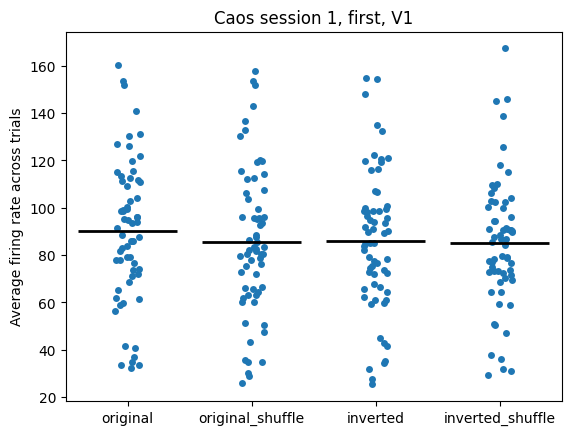

Total channels = 63
              Perturbation Pair  t-statistic   p-value  mean effect size  \
0  original vs original_shuffle     2.536417  0.013732         -4.529555   
1          original vs inverted     2.942752  0.004571         -4.081660   
2  inverted vs inverted_shuffle     0.619652  0.537758         -0.932598   

   SEM effect size  
0         1.771579  
1         1.375969  
2         1.493043  


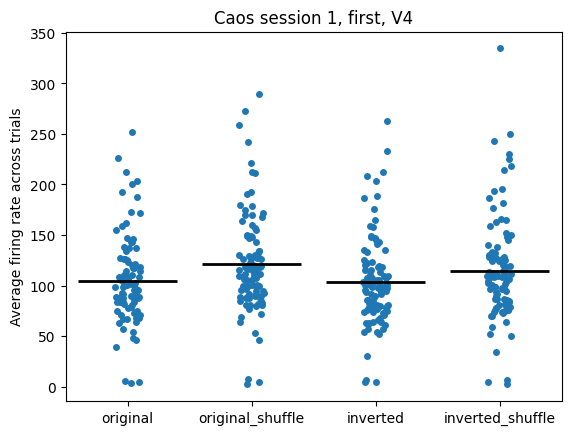

Total channels = 99
              Perturbation Pair  t-statistic       p-value  mean effect size  \
0  original vs original_shuffle   -10.498850  1.003328e-17         16.443204   
1          original vs inverted     1.349357  1.803316e-01         -1.436387   
2  inverted vs inverted_shuffle    -9.118991  9.881335e-15         11.575455   

   SEM effect size  
0         1.558261  
1         1.059108  
2         1.262952  


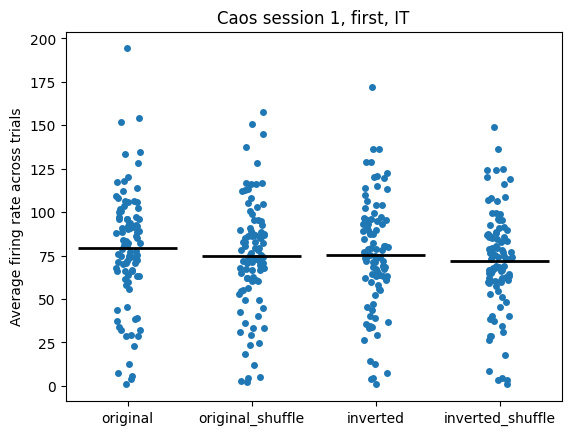

Total channels = 96
              Perturbation Pair  t-statistic   p-value  mean effect size  \
0  original vs original_shuffle     3.865175  0.000203         -4.524149   
1          original vs inverted     3.614516  0.000484         -3.834466   
2  inverted vs inverted_shuffle     3.715092  0.000343         -3.578919   

   SEM effect size  
0         1.164378  
1         1.055312  
2         0.958316  


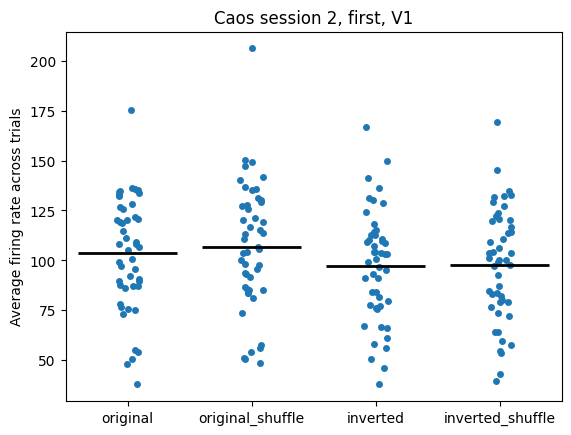

Total channels = 48
              Perturbation Pair  t-statistic   p-value  mean effect size  \
0  original vs original_shuffle    -1.834087  0.072977          2.911505   
1          original vs inverted     4.405964  0.000061         -6.470557   
2  inverted vs inverted_shuffle    -0.287634  0.774892          0.598286   

   SEM effect size  
0         1.570818  
1         1.453212  
2         2.058245  


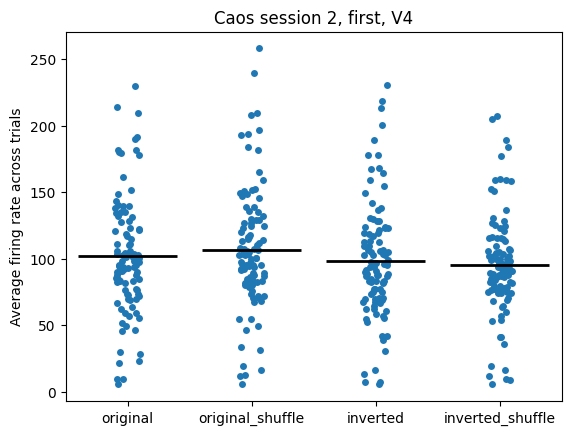

Total channels = 102
              Perturbation Pair  t-statistic   p-value  mean effect size  \
0  original vs original_shuffle    -3.768189  0.000277          5.020865   
1          original vs inverted     3.117263  0.002378         -3.494587   
2  inverted vs inverted_shuffle     2.364182  0.019982         -3.228035   

   SEM effect size  
0         1.325887  
1         1.115535  
2         1.358683  


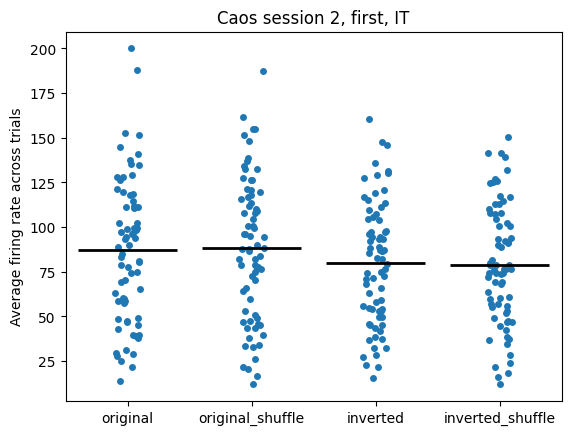

Total channels = 72
              Perturbation Pair  t-statistic   p-value  mean effect size  \
0  original vs original_shuffle    -0.998915  0.321228          1.420129   
1          original vs inverted     3.592133  0.000601         -7.185119   
2  inverted vs inverted_shuffle     0.534874  0.594408         -1.090461   

   SEM effect size  
0         1.411764  
1         1.986298  
2         2.024518  


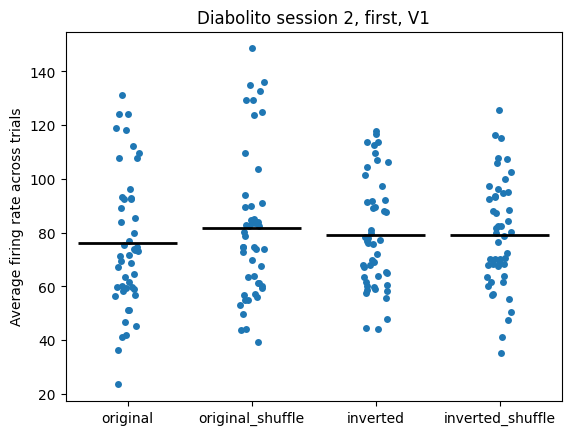

Total channels = 48
              Perturbation Pair  t-statistic   p-value  mean effect size  \
0  original vs original_shuffle    -4.661289  0.000026          5.709495   
1          original vs inverted    -2.193568  0.033248          2.916943   
2  inverted vs inverted_shuffle    -0.193425  0.847459          0.210385   

   SEM effect size  
0         1.212048  
1         1.315846  
2         1.076290  


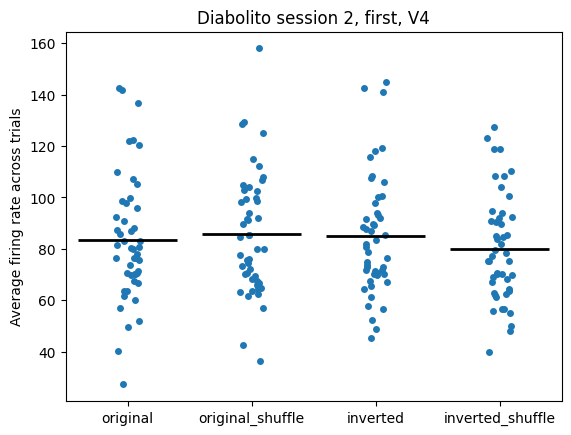

Total channels = 48
              Perturbation Pair  t-statistic   p-value  mean effect size  \
0  original vs original_shuffle    -1.193808  0.238544          2.162896   
1          original vs inverted    -0.876198  0.385379          1.472347   
2  inverted vs inverted_shuffle     3.145970  0.002870         -5.140167   

   SEM effect size  
0         1.792791  
1         1.662786  
2         1.616780  


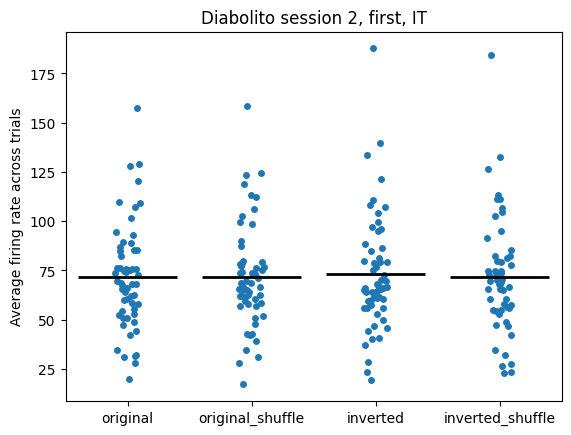

Total channels = 57
              Perturbation Pair  t-statistic   p-value  mean effect size  \
0  original vs original_shuffle     0.023670  0.981200         -0.031239   
1          original vs inverted    -0.987632  0.327581          1.527085   
2  inverted vs inverted_shuffle     1.149242  0.255341         -1.197420   

   SEM effect size  
0         1.308108  
1         1.532585  
2         1.032741  


In [445]:
def plot_channel_strips(df, option, region, title):

    fig = plt.figure()

    sns.stripplot(data=df[(df['Option']==option) & (df['Region']==region)], x='Perturb', y='Average firing',  order= ['original', 'original_shuffle', 'inverted', 'inverted_shuffle'])

    sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="Perturb",
            y="Average firing",
            data=df[(df['Option']==option) & (df['Region']==region)],
            showfliers=False,
            showbox=False,
            showcaps=False)
    
    plt.xlabel('')
    plt.ylabel('Average firing rate across trials')

    plt.title(f'{title}, {option}, {region}')

    plt.show()

    perturb_pairs = [('original', 'original_shuffle'), ('original', 'inverted'), ('inverted', 'inverted_shuffle')]

    results = []

    df_use = df[(df['Option']==option) & (df['Region']==region)]

    # Iterate over perturb pairs
    for pair in perturb_pairs:
        pert1, pert2 = pair

        # Filter data for each perturbation
        df_pert1 = df_use[df_use['Perturb'] == pert1]
        df_pert2 = df_use[df_use['Perturb'] == pert2]


        # Merge data on Filename, Channel, and Option to ensure matching
        merged = pd.merge(
            df_pert1,
            df_pert2,
            on=['Movie', 'Channel', 'Option'],
            suffixes=(f'_{pert1}', f'_{pert2}')
        )

        # Extract firing rates
        firing_pert1 = np.asarray(merged[f'Average firing_{pert1}'])
        firing_pert2 = np.asarray(merged[f'Average firing_{pert2}'])

        mean_diff = np.mean(firing_pert2 - firing_pert1)
        std_diff = np.std(firing_pert2-firing_pert1)

        sem = std_diff/np.sqrt(len(firing_pert1))

        # Perform paired t-test
        t_stat, p_value = ttest_rel(firing_pert1, firing_pert2)

        # Store results
        results.append({
            'Perturbation Pair': f'{pert1} vs {pert2}',
            't-statistic': t_stat,
            'p-value': p_value,
            'mean effect size': mean_diff,
            'SEM effect size': sem
        })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Display results
    print(f'Total channels = {len(firing_pert1)}')
    print(results_df)
        

plot_channel_strips(Caos_session1_1_df, 'first', 'V1', 'Caos session 1')
plot_channel_strips(Caos_session1_1_df, 'first', 'V4', 'Caos session 1')
plot_channel_strips(Caos_session1_1_df, 'first', 'IT', 'Caos session 1')

plot_channel_strips(Caos_session2_1_df, 'first', 'V1', 'Caos session 2')
plot_channel_strips(Caos_session2_1_df, 'first', 'V4', 'Caos session 2')
plot_channel_strips(Caos_session2_1_df, 'first', 'IT', 'Caos session 2')

plot_channel_strips(Diabolito_session1_1_df, 'first', 'V1', 'Diabolito session 2')
plot_channel_strips(Diabolito_session1_1_df, 'first', 'V4', 'Diabolito session 2')
plot_channel_strips(Diabolito_session1_1_df, 'first', 'IT', 'Diabolito session 2')

#plot_channel_strips(df, 'first', 'V1', 'Caos session 1')
#plot_channel_strips(df, 'first', 'V4', 'Caos session 1')
#plot_channel_strips(df, 'first', 'IT', 'Caos session 1')

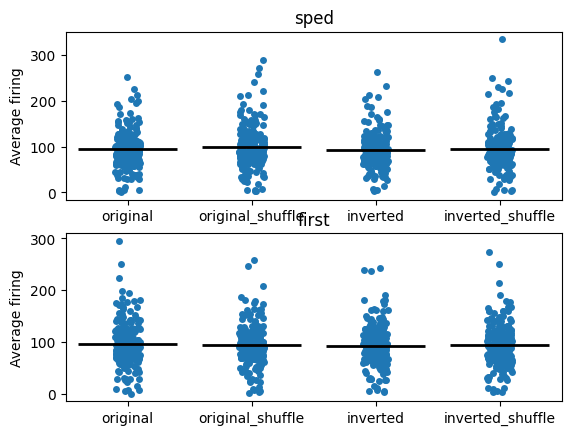

In [413]:


fig, axs = plt.subplots(2,1)

sns.stripplot(data=df[df['Option']=='sped'], ax=axs[0], x="Perturb", y="Average firing", order= ['original', 'original_shuffle', 'inverted', 'inverted_shuffle']) 
sns.boxplot(ax= axs[0],showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="Perturb",
            y="Average firing",
            data=df[df['Option']=='sped'],
            showfliers=False,
            showbox=False,
            showcaps=False)

axs[0].set_xlabel('')
axs[0].set_title('sped')

sns.stripplot(data=df[df['Option']=='first'], ax=axs[1], x="Perturb", y="Average firing", order= ['original', 'original_shuffle', 'inverted', 'inverted_shuffle'])
sns.boxplot(ax= axs[1],showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="Perturb",
            y="Average firing",
            data=df[df['Option']=='first'],
            showfliers=False,
            showbox=False,
            showcaps=False)

axs[1].set_xlabel('')
axs[1].set_title('first')

plt.show()



In [339]:
from scipy.stats import ttest_rel, ttest_1samp

In [369]:
perturb_pairs = [('original', 'original_shuffle'), ('original', 'inverted'), ('inverted', 'inverted_shuffle')]

results = []

df_first = df[df['Option']=='first']
df_sped = df[df['Option']=='sped']

df_first_use = df_first[df_first['Perturb'] == 'original']
df_sped_use = df_sped[df_sped['Perturb'] == 'original']

for region in ['V1', 'V4', 'IT']:

    fig = plt.figure()

    df_first_region = df_first_use[df_first_use['Region']==region]
    df_sped_region = df_sped_use[df_sped_use['Region']==region]

    merged = pd.merge(
        df_first_region,
        df_sped_region,
        on=['Movie', 'Channel'],
        suffixes=(f'_first', f'_sped')
    )

    firing_pert1 = merged[f'Average firing_first']
    firing_pert2 = merged[f'Average firing_sped']

    # Perform paired t-test
    t_stat, p_value = ttest_rel(firing_pert1, firing_pert2)

    # Store results
    results.append({
        'Region': f'{region}',
        't-statistic': t_stat,
        'p-value': p_value
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)

  Region  t-statistic       p-value
0     V1    -1.239070  2.229184e-01
1     V4    -5.574778  2.316027e-07
2     IT     2.438783  1.679318e-02


In [343]:
perturb_pairs = [('original', 'original_shuffle'), ('original', 'inverted'), ('inverted', 'inverted_shuffle')]

results = []

df_use = df[df['Option']=='first']

# Iterate over perturb pairs
for pair in perturb_pairs:
    pert1, pert2 = pair

    # Filter data for each perturbation
    df_pert1 = df_use[df_use['Perturb'] == pert1]
    df_pert2 = df_use[df_use['Perturb'] == pert2]


    # Merge data on Filename, Channel, and Option to ensure matching
    merged = pd.merge(
        df_pert1,
        df_pert2,
        on=['Movie', 'Channel', 'Option'],
        suffixes=(f'_{pert1}', f'_{pert2}')
    )

    # Extract firing rates
    firing_pert1 = merged[f'Average firing_{pert1}']
    firing_pert2 = merged[f'Average firing_{pert2}']

    # Perform paired t-test
    t_stat, p_value = ttest_rel(firing_pert1, firing_pert2)

    # Store results
    results.append({
        'Perturbation Pair': f'{pert1} vs {pert2}',
        't-statistic': t_stat,
        'p-value': p_value
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)

One sample ttest on absolute difference
original vs original_shuffle
t-statistic: 17.83893459226462
p-value: 1.088820817594417e-44
One sample ttest on absolute difference
original vs inverted
t-statistic: 17.09338910483872
p-value: 2.631919176620411e-42
One sample ttest on absolute difference
inverted vs inverted_shuffle
t-statistic: 17.442968250602245
p-value: 1.998291717269714e-43
              Perturbation Pair  t-statistic   p-value
0  original vs original_shuffle    -4.144058  0.000049
1          original vs inverted     3.671841  0.000302
2  inverted vs inverted_shuffle    -3.769589  0.000210


In [207]:
import os
import cv2
import numpy as np

def match_frames(video_folder, frames_folder):
    """
    Match frames from videos to the unordered frames in the frames folder using pixel-wise distance.

    Args:
        video_folder (str): Path to the folder containing video files.
        frames_folder (str): Path to the folder containing frame images.

    Returns:
        dict: A dictionary where keys are video filenames and values are lists of ordered frame filenames.
    """
    video_to_frames_mapping = {}

    # Get list of all video files and frame files
    video_files = [f for f in os.listdir(video_folder) if f.endswith(('.mp4', '.avi', '.mov', '.mkv'))]
    frame_files = [f for f in os.listdir(frames_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Load all frames as grayscale images into a dictionary
    frame_images = {}
    for frame_file in frame_files:
        frame_path = os.path.join(frames_folder, frame_file)
        frame_images[frame_file] = cv2.imread(frame_path).astype('int16')

    for video_file in video_files:
        video_path = os.path.join(video_folder, video_file)
        cap = cv2.VideoCapture(video_path)
        ordered_frames = []

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Convert the video frame to grayscale
            video_frame_gray = frame.astype('int16')

            # Find the best matching frame
            best_match = None
            min_distance = float('inf')

            for frame_name, frame_image in frame_images.items():
                # Calculate pixel-wise absolute difference
                distance = np.sum(np.abs(video_frame_gray - frame_image))
                if distance < min_distance:
                    min_distance = distance
                    best_match = frame_name

            if best_match:
                ordered_frames.append(best_match)

        cap.release()
        video_to_frames_mapping[video_file] = ordered_frames

    return video_to_frames_mapping

# Example usage
video_folder_path = "/Users/dysprague/Ponce_rotation/data/move_stim_old/all_movies"  # Update with the path to your video folder
frames_folder_path = "/Users/dysprague/Ponce_rotation/data/move_stim_old/all_images"  # Update with the path to your frames folder

mapping = match_frames(video_folder_path, frames_folder_path)

with open("/Users/dysprague/Ponce_rotation/data/move_stim_old/movie_frame_mapping.pickle", 'wb') as handle:
    pickle.dump(mapping, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Print or save the results
for video, frames in mapping.items():
    print(f"Video: {video}")
    print(f"Ordered Frames: {frames}")


Video: monkey_fighting_first_noise.mp4
Ordered Frames: ['monkey_fighting_0_inverted.png', 'monkey_fighting_4_noise.png', 'monkey_fighting_8_noise.png', 'monkey_fighting_12_noise.png', 'monkey_fighting_16_noise.png', 'monkey_fighting_20_noise.png', 'monkey_fighting_24_noise.png', 'monkey_fighting_28_noise.png', 'monkey_fighting_32_noise.png', 'monkey_fighting_36_noise.png', 'monkey_fighting_40_noise.png', 'monkey_fighting_44_noise.png']
Video: soccer_ball_sped_inverted_shuffle.mp4
Ordered Frames: ['soccer_ball_5_inverted.png', 'soccer_ball_8_inverted.png', 'soccer_ball_10_inverted.png', 'soccer_ball_3_inverted.png', 'soccer_ball_2_inverted.png', 'soccer_ball_7_inverted.png', 'soccer_ball_6_inverted.png', 'soccer_ball_4_inverted.png', 'soccer_ball_9_inverted.png', 'soccer_ball_1_inverted.png', 'soccer_ball_11_inverted.png', 'soccer_ball_0_inverted.png']
Video: fan_sped_inverted_shuffle.mp4
Ordered Frames: ['fan_7_inverted.png', 'fan_11_inverted.png', 'fan_0_inverted.png', 'fan_13_inverte

## Analyze layer activations

In [210]:
with open("/Users/dysprague/Ponce_rotation/data/move_stim_old/movie_frame_mapping.pickle", "rb") as handle:
    movie_frame_mapping = pickle.load(handle)

with open("/Users/dysprague/Ponce_rotation/data/net_layer_activations/move_stimuli/all_images.pickle", "rb") as handle:
    net_layer_dict = pickle.load(handle)

net_layer_im_names = np.load("/Users/dysprague/Ponce_rotation/data/net_layer_activations/move_stimuli/image_names.npy")

/var/folders/9t/68zflby9385dfmd93cm_b7ph0000gn/T/ipykernel_72091/1864811708.py:5: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  net_layer_dict = pickle.load(handle)


In [ ]:
frame_activations = {}

for i, name in enumerate(net_layer_im_names):
    frame_activations[name] = {key: { key2 : value2[i] for key2, value2 in value.items()} for key, value in net_layer_dict.items()}

In [219]:
def get_layer_activations(frames, net, layer, frame_activations):

    activations_full = []

    for frame in frames:
        activations = frame_activations[frame][net][layer]
        activations_full.append(activations)

    return np.asarray(activations_full)


In [245]:
import random

seed = 14

video = 'ambulance'

first_im_frames= movie_frame_mapping[f'{video}_first_original.mp4']
first_shuffle_im_frames= movie_frame_mapping[f'{video}_first_original_shuffle.mp4']
sped_im_frames= movie_frame_mapping[f'{video}_sped_original.mp4']
sped_shuffle_im_frames= movie_frame_mapping[f'{video}_sped_original_shuffle.mp4']

net = 'cornet_s' # dict_keys(['resnet50', 'resnet50_linf_8', 'cornet_s', 'alexnet'])
layer1 = '.V4.BatchNorm2dnorm3_3' 
layer2 = '.IT.BatchNorm2dnorm3_1'

layer1_activations_first = get_layer_activations(first_im_frames, net, layer1, frame_activations)
layer1_activations_first_shuffle = get_layer_activations(first_shuffle_im_frames, net, layer1, frame_activations)
layer1_activations_sped = get_layer_activations(sped_im_frames, net, layer1, frame_activations)
layer1_activations_sped_shuffle = get_layer_activations(sped_shuffle_im_frames, net, layer1, frame_activations)

layer2_activations_first = get_layer_activations(first_im_frames, net, layer2, frame_activations)
layer2_activations_first_shuffle = get_layer_activations(first_shuffle_im_frames, net, layer2, frame_activations)
layer2_activations_sped = get_layer_activations(sped_im_frames, net, layer2, frame_activations)
layer2_activations_sped_shuffle = get_layer_activations(sped_shuffle_im_frames, net, layer2, frame_activations)

fig, axs = plt.subplots(2,4)

dims_layer1 = layer1_activations_first.shape[1]
dims_layer2 = layer2_activations_first.shape[1]

layer1_samples = np.random.randint(0,dims_layer1, 4)
layer2_samples = np.random.randint(0,dims_layer2, 4)

for i in range(4):
    axs[0,i].plot(layer1_activations_first[:,layer1_samples[i]], label='first')
    axs[0,i].plot(layer1_activations_first_shuffle[:,layer1_samples[i]], label='first_shuffle')
    axs[0,i].plot(layer1_activations_sped[:,layer1_samples[i]], label='sped')
    axs[0,i].plot(layer1_activations_sped_shuffle[:,layer1_samples[i]], label='sped_shuffle')

    axs[1,i].plot(layer2_activations_first[:,layer2_samples[i]], label='first')
    axs[1,i].plot(layer2_activations_first_shuffle[:,layer2_samples[i]], label='first_shuffle')
    axs[1,i].plot(layer2_activations_sped[:,layer2_samples[i]], label='sped')
    axs[1,i].plot(layer2_activations_sped_shuffle[:,layer2_samples[i]], label='sped_shuffle')

axs[0,0].set_ylabel(f'{layer1}')
axs[1,0].set_ylabel(f'{layer2}')

plt.suptitle(f'{video}, {net} activations from random sampled neurons')

plt.legend(bbox_to_anchor=(2.3, 1), loc='right')

plt.show()

(12, 256)

In [221]:
layer1_activations.shape

(12, 256)

In [215]:
movie_frame_mapping

{'monkey_fighting_first_noise.mp4': ['monkey_fighting_0_inverted.png',
  'monkey_fighting_4_noise.png',
  'monkey_fighting_8_noise.png',
  'monkey_fighting_12_noise.png',
  'monkey_fighting_16_noise.png',
  'monkey_fighting_20_noise.png',
  'monkey_fighting_24_noise.png',
  'monkey_fighting_28_noise.png',
  'monkey_fighting_32_noise.png',
  'monkey_fighting_36_noise.png',
  'monkey_fighting_40_noise.png',
  'monkey_fighting_44_noise.png'],
 'soccer_ball_sped_inverted_shuffle.mp4': ['soccer_ball_5_inverted.png',
  'soccer_ball_8_inverted.png',
  'soccer_ball_10_inverted.png',
  'soccer_ball_3_inverted.png',
  'soccer_ball_2_inverted.png',
  'soccer_ball_7_inverted.png',
  'soccer_ball_6_inverted.png',
  'soccer_ball_4_inverted.png',
  'soccer_ball_9_inverted.png',
  'soccer_ball_1_inverted.png',
  'soccer_ball_11_inverted.png',
  'soccer_ball_0_inverted.png'],
 'fan_sped_inverted_shuffle.mp4': ['fan_7_inverted.png',
  'fan_11_inverted.png',
  'fan_0_inverted.png',
  'fan_13_inverted.png

In [218]:
frame_activations[net_layer_im_names[0]]['cornet_s'].keys()

dict_keys(['.V1.BatchNorm2dnorm2', '.V2.BatchNorm2dnorm3_1', '.V4.BatchNorm2dnorm3_3', '.IT.BatchNorm2dnorm3_1'])

In [211]:
net_layer_im_names

array(['horses_80_original.png', 'komodo_2_original.png',
       'soccer_ball_9_noise.png', 'horses_30_noise.png',
       'monkey_fighting_20_noise.png', 'monkey_fighting_8_original.png',
       'macaque_running_41_original.png', 'ambulance_100_original.png',
       'fan_2_inverted.png', 'komodo_6_noise.png',
       'macaque_running_25_inverted.png', 'cats_jumping_41_noise.png',
       'fan_12_inverted.png', 'monkey_grooming_55_inverted.png',
       'monkey_fighting_4_noise.png', 'fan_6_noise.png',
       'soccer_ball_16_noise.png', 'fan_8_noise.png',
       'horses_100_original.png', 'macaque_eating_10_original.png',
       'soccer_ball_44_noise.png', 'horses_110_inverted.png',
       'horses_15_noise.png', 'horses_33_original.png',
       'komodo_9_original.png', 'horses_0_original.png',
       'komodo_10_original.png', 'monkey_fighting_16_inverted.png',
       'komodo_25_inverted.png', 'soccer_ball_24_inverted.png',
       'cats_jumping_11_inverted.png', 'monkey_grooming_50_inverted